<a href="https://colab.research.google.com/github/caldi99/Computer-Vision-Project/blob/develop/TrainModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create dataset folder
Paste hands2.csv

global()

dir()

del namevariable

In [1]:
!wget 'http://vision.soic.indiana.edu/egohands_files/egohands_data.zip'

--2022-06-03 19:40:02--  http://vision.soic.indiana.edu/egohands_files/egohands_data.zip
Resolving vision.soic.indiana.edu (vision.soic.indiana.edu)... 156.56.83.26
Connecting to vision.soic.indiana.edu (vision.soic.indiana.edu)|156.56.83.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1332784625 (1.2G) [application/zip]
Saving to: ‘egohands_data.zip’

egohands_data.zip   100%[===================>]   1.24G  13.5MB/s    in 96s     

2022-06-03 19:41:40 (13.2 MB/s) - ‘egohands_data.zip’ saved [1332784625/1332784625]



In [2]:
!unzip "egohands_data.zip" -d "/content/dataset/"

Archive:  egohands_data.zip
  inflating: /content/dataset/DEMO_1.m  
  inflating: /content/dataset/DEMO_2.m  
  inflating: /content/dataset/README.txt  
   creating: /content/dataset/_LABELLED_SAMPLES/
   creating: /content/dataset/_LABELLED_SAMPLES/CARDS_COURTYARD_B_T/
  inflating: /content/dataset/_LABELLED_SAMPLES/CARDS_COURTYARD_B_T/frame_0011.jpg  
  inflating: /content/dataset/_LABELLED_SAMPLES/CARDS_COURTYARD_B_T/frame_0036.jpg  
  inflating: /content/dataset/_LABELLED_SAMPLES/CARDS_COURTYARD_B_T/frame_0099.jpg  
  inflating: /content/dataset/_LABELLED_SAMPLES/CARDS_COURTYARD_B_T/frame_0113.jpg  
  inflating: /content/dataset/_LABELLED_SAMPLES/CARDS_COURTYARD_B_T/frame_0176.jpg  
  inflating: /content/dataset/_LABELLED_SAMPLES/CARDS_COURTYARD_B_T/frame_0183.jpg  
  inflating: /content/dataset/_LABELLED_SAMPLES/CARDS_COURTYARD_B_T/frame_0184.jpg  
  inflating: /content/dataset/_LABELLED_SAMPLES/CARDS_COURTYARD_B_T/frame_0187.jpg  
  inflating: /content/dataset/_LABELLED_SAMPLES/C

In [3]:
import os

#extension must be specified in .extension
def removeFiles(extension,initialPath):
  list = os.listdir(initialPath)
  for elem in list:
    if(len(elem.split(extension)) > 1):
      os.remove(initialPath + elem)

removeFiles(".m","/content/dataset/")
removeFiles(".mat","/content/dataset/")
removeFiles(".txt","/content/dataset/")

In [4]:
import os

def moveFiles(source,destination):
  list = os.listdir(source)
  i=0
  for dir in list:
    list2 = os.listdir(source + dir)
    for img in list2:
      if(len(img.split(".jpg")) > 1):
        os.replace(source + dir +"/"+img, destination + str(i)+".jpg")
      else:
        os.replace(source + dir +"/"+img, destination + img)

      i=i+1
      #os.replace("/content/dataset/images/" + dir +"/"+)

moveFiles("/content/dataset/_LABELLED_SAMPLES/","/content/dataset/")
removeFiles(".mat","/content/dataset/")

In [5]:
import os
def removeDirectories():
  list = os.listdir("/content/dataset/_LABELLED_SAMPLES")
  for dir in list:
    os.removedirs("/content/dataset/_LABELLED_SAMPLES/"+ dir)

removeDirectories()

In [6]:
#load images and name of the files
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import os

BASE_DIR = "/content/dataset/"
list_files = os.listdir("/content/dataset/")
data = []
filenames = []


for file in list_files:
  imagePath = BASE_DIR + file
  image = load_img(imagePath, target_size=(224, 224))
  image = img_to_array(image)	
  data.append(image)
  filenames.append(file)

In [7]:
#load the targets

targets = []
CSV_PATH = "hands2.csv"
rows = open(CSV_PATH).read().strip().split("\n")

w = 1280
h = 720

for row in rows:
  row = row.split(",")

  (filename, startX1, startY1, endX1, endY1,startX2, startY2, endX2, endY2,startX3, startY3, endX3, endY3,startX4, startY4, endX4, endY4) = row 
   
  startX1 = float(startX1) / w
  startY1 = float(startY1) / h
  endX1 = float(endX1) / w
  endY1 = float(endY1) / h
  
  startX2 = float(startX2) / w
  startY2 = float(startY2) / h
  endX2 = float(endX2) / w
  endY2 = float(endY2) / h
  
  startX3 = float(startX3) / w
  startY3 = float(startY3) / h
  endX3 = float(endX3) / w
  endY3 = float(endY3) / h
  
  startX4 = float(startX4) / w
  startY4 = float(startY4) / h
  endX4 = float(endX4) / w
  endY4 = float(endY4) / h

  targets.append((startX1, startY1, endX1, endY1,startX2, startY2, endX2, endY2,startX3, startY3, endX3, endY3,startX4, startY4, endX4, endY4))

In [8]:
#prepare training set
import numpy as np
data = np.array(data,dtype ="float32") / 255.0
targets = np.array(targets,dtype ="float32")

In [9]:
#split the data
from sklearn.model_selection import train_test_split

split = train_test_split(data, targets, filenames, test_size=0.10, random_state=42)

(trainImages, testImages) = split[:2]
(trainTargets, testTargets) = split[2:4]
(trainFilenames, testFilenames) = split[4:]

In [10]:
#build the model

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

LEARNING_RATE = 1e-4

vgg = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
vgg.trainable = False

flatten = vgg.output
flatten = Flatten()(flatten)
bboxHead = Dense(128, activation="relu")(flatten)
bboxHead = Dense(64, activation="relu")(bboxHead)
bboxHead = Dense(32, activation="relu")(bboxHead)
bboxHead = Dense(16, activation="sigmoid")(bboxHead)
model = Model(inputs=vgg.input, outputs=bboxHead)

opt = Adam(learning_rate = LEARNING_RATE)
model.compile(loss="mse", optimizer=opt)
print(model.summary())

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [11]:
#train the model
EPOCHS = 25
BATCH_SIZE = 32

H = model.fit(trainImages, trainTargets, validation_data=(testImages, testTargets),
              batch_size = BATCH_SIZE,epochs = EPOCHS,
              verbose=1)

Epoch 1/25
135/135 [==============================] - 36s 174ms/step - loss: 0.0808 - val_loss: 0.0802
Epoch 2/25
135/135 [==============================] - 23s 171ms/step - loss: 0.0766 - val_loss: 0.0800
Epoch 3/25
135/135 [==============================] - 23s 173ms/step - loss: 0.0754 - val_loss: 0.0802
Epoch 4/25
135/135 [==============================] - 25s 184ms/step - loss: 0.0743 - val_loss: 0.0802
Epoch 5/25
135/135 [==============================] - 28s 205ms/step - loss: 0.0731 - val_loss: 0.0808
Epoch 6/25
135/135 [==============================] - 25s 186ms/step - loss: 0.0720 - val_loss: 0.0819
Epoch 7/25
135/135 [==============================] - 25s 183ms/step - loss: 0.0703 - val_loss: 0.0842
Epoch 8/25
135/135 [==============================] - 25s 186ms/step - loss: 0.0682 - val_loss: 0.0820
Epoch 9/25
135/135 [==============================] - 25s 186ms/step - loss: 0.0664 - val_loss: 0.0832
Epoch 10/25
135/135 [==============================] - 25s 184ms/step - l

In [12]:
#save the model
import shutil

MODEL_PATH = "model"
model.save(MODEL_PATH, save_format="h5")



In [28]:
globals()

{'Adam': keras.optimizer_v2.adam.Adam,
 'BASE_DIR': '/content/dataset/',
 'BATCH_SIZE': 32,
 'CSV_PATH': 'hands2.csv',
 'Dense': keras.layers.core.dense.Dense,
 'EPOCHS': 25,
 'Flatten': keras.layers.core.flatten.Flatten,
 'H': <keras.callbacks.History at 0x7fde9032bc90>,
 'In': ['',
  'get_ipython().system("wget \'http://vision.soic.indiana.edu/egohands_files/egohands_data.zip\'")',
  'get_ipython().system(\'unzip "egohands_data.zip" -d "/content/dataset/"\')',
  'import os\n\n#extension must be specified in .extension\ndef removeFiles(extension,initialPath):\n  list = os.listdir(initialPath)\n  for elem in list:\n    if(len(elem.split(extension)) > 1):\n      os.remove(initialPath + elem)\n\nremoveFiles(".m","/content/dataset/")\nremoveFiles(".mat","/content/dataset/")\nremoveFiles(".txt","/content/dataset/")',
  'import os\n\ndef moveFiles(source,destination):\n  list = os.listdir(source)\n  i=0\n  for dir in list:\n    list2 = os.listdir(source + dir)\n    for img in list2:\n      

In [27]:

del filenames

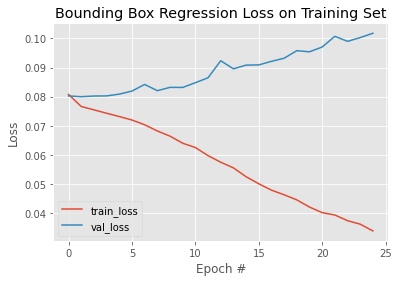

In [29]:
# plot the model training history
import matplotlib.pyplot as plt

N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Bounding Box Regression Loss on Training Set")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

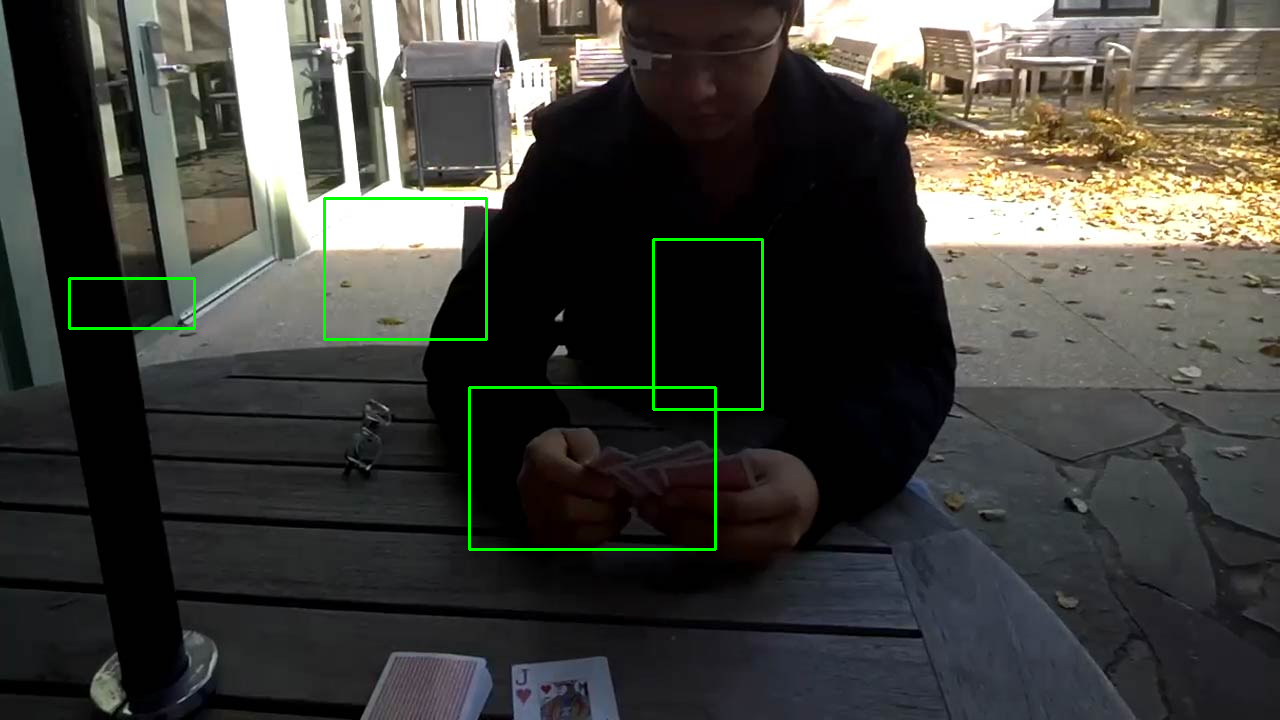

In [34]:
#predict
import cv2
import imutils
from google.colab.patches import cv2_imshow

image = load_img("/content/frame_0011.jpg", target_size=(224, 224))
image = img_to_array(image) / 255.0
image = np.expand_dims(image, axis=0)

preds = model.predict(image)[0]


(startX1, startY1, endX1, endY1,startX2, startY2, endX2, endY2,startX3, startY3, endX3, endY3,startX4, startY4, endX4, endY4) = preds






image = cv2.imread("/content/frame_0011.jpg")


w= 1280
h= 720

startX1 = int(startX1 * w)
startY1 = int(startY1 * h)
endX1 = int(endX1 * w)
endY1 = int(endY1 * h)

startX2 = int(startX2 * w)
startY2 = int(startY2 * h)
endX2 = int(endX2 * w)
endY2 = int(endY2 * h)

startX3 = int(startX3 * w)
startY3 = int(startY3 * h)
endX3 = int(endX3 * w)
endY3 = int(endY3 * h)

startX4 = int(startX4 * w)
startY4 = int(startY4 * h)
endX4 = int(endX4 * w)
endY4 = int(endY4 * h)
# draw the predicted bounding box on the image
cv2.rectangle(image, (startX1, startY1), (endX1, endY1),(0, 255, 0), 2)
cv2.rectangle(image, (startX2, startY2), (endX2, endY2),(0, 255, 0), 2)
cv2.rectangle(image, (startX3, startY3), (endX3, endY3),(0, 255, 0), 2)
cv2.rectangle(image, (startX4, startY4), (endX4, endY4),(0, 255, 0), 2)

cv2_imshow(image)